<a href="https://colab.research.google.com/github/NassimKhair/NassimKhair/blob/main/Cars_Prices_Analysis_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
# Upload the dataset in a dataframe form
data = pd.read_csv("sales_data_sample.csv"
                       ,encoding=('ISO-8859-1')
                  ,parse_dates=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [ ]:
data

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [ ]:
# Select the chosen columns
sd = data[['ORDERNUMBER','PRODUCTLINE','QUANTITYORDERED','PRICEEACH','ORDERDATE','ADDRESSLINE1','MONTH_ID','CITY']]
sd.head()

,ORDERNUMBER,PRODUCTLINE,QUANTITYORDERED,PRICEEACH,ORDERDATE,ADDRESSLINE1,MONTH_ID,CITY
0,10107,Motorcycles,30,95.70,2/24/2003 0:00,897 Long Airport Avenue,2,NYC
1,10121,Motorcycles,34,81.35,5/7/2003 0:00,59 rue de l'Abbaye,5,Reims
2,10134,Motorcycles,41,94.74,7/1/2003 0:00,27 rue du Colonel Pierre Avia,7,Paris
3,10145,Motorcycles,45,83.26,8/25/2003 0:00,78934 Hillside Dr.,8,Pasadena
4,10159,Motorcycles,49,100.00,10/10/2003 0:00,7734 Strong St.,10,San Francisco


In [ ]:
sd

,ORDERNUMBER,PRODUCTLINE,QUANTITYORDERED,PRICEEACH,ORDERDATE,ADDRESSLINE1,MONTH_ID,CITY
0,10107,Motorcycles,30,95.70,2/24/2003 0:00,897 Long Airport Avenue,2,NYC
1,10121,Motorcycles,34,81.35,5/7/2003 0:00,59 rue de l'Abbaye,5,Reims
2,10134,Motorcycles,41,94.74,7/1/2003 0:00,27 rue du Colonel Pierre Avia,7,Paris
3,10145,Motorcycles,45,83.26,8/25/2003 0:00,78934 Hillside Dr.,8,Pasadena
4,10159,Motorcycles,49,100.00,10/10/2003 0:00,7734 Strong St.,10,San Francisco
...,...,...,...,...,...,...,...,...
2818,10350,Ships,20,100.00,12/2/2004 0:00,"C/ Moralzarzal, 86",12,Madrid
2819,10373,Ships,29,100.00,1/31/2005 0:00,Torikatu 38,1,Oulu
2820,10386,Ships,43,100.00,3/1/2005 0:00,"C/ Moralzarzal, 86",3,Madrid
2821,10397,Ships,34,62.24,3/28/2005 0:00,1 rue Alsace-Lorraine,3,Toulouse


In [ ]:
print(type(sd['ORDERNUMBER'][0]))

<class 'numpy.int64'>


In [ ]:
#To know the empty columns
sd.isnull().sum()

ORDERNUMBER        0
PRODUCTLINE        0
QUANTITYORDERED    0
PRICEEACH          0
ORDERDATE          0
ADDRESSLINE1       0
MONTH_ID           0
CITY               0
dtype: int64

In [ ]:
#THe chosen columns is not empty
sd.isna().any()

ORDERNUMBER        False
PRODUCTLINE        False
QUANTITYORDERED    False
PRICEEACH          False
ORDERDATE          False
ADDRESSLINE1       False
MONTH_ID           False
CITY               False
dtype: bool

In [ ]:
sd.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,MONTH_ID
count,2823.000000,2823.000000,2823.000000,2823.000000
mean,10258.725115,35.092809,83.658544,7.092455
std,92.085478,9.741443,20.174277,3.656633
min,10100.000000,6.000000,26.880000,1.000000
25%,10180.000000,27.000000,68.860000,4.000000
50%,10262.000000,35.000000,95.700000,8.000000
75%,10333.500000,43.000000,100.000000,11.000000
max,10425.000000,97.000000,100.000000,12.000000


In [ ]:
sd

,ORDERNUMBER,PRODUCTLINE,QUANTITYORDERED,PRICEEACH,ORDERDATE,ADDRESSLINE1,MONTH_ID,CITY
0,10107,Motorcycles,30,95.70,2/24/2003 0:00,897 Long Airport Avenue,2,NYC
1,10121,Motorcycles,34,81.35,5/7/2003 0:00,59 rue de l'Abbaye,5,Reims
2,10134,Motorcycles,41,94.74,7/1/2003 0:00,27 rue du Colonel Pierre Avia,7,Paris
3,10145,Motorcycles,45,83.26,8/25/2003 0:00,78934 Hillside Dr.,8,Pasadena
4,10159,Motorcycles,49,100.00,10/10/2003 0:00,7734 Strong St.,10,San Francisco
...,...,...,...,...,...,...,...,...
2818,10350,Ships,20,100.00,12/2/2004 0:00,"C/ Moralzarzal, 86",12,Madrid
2819,10373,Ships,29,100.00,1/31/2005 0:00,Torikatu 38,1,Oulu
2820,10386,Ships,43,100.00,3/1/2005 0:00,"C/ Moralzarzal, 86",3,Madrid
2821,10397,Ships,34,62.24,3/28/2005 0:00,1 rue Alsace-Lorraine,3,Toulouse


In [ ]:
#Display the types and quantities of sold products
sd['PRODUCTLINE'].value_counts()

Classic Cars        967
Vintage Cars        607
Motorcycles         331
Planes              306
Trucks and Buses    301
Ships               234
Trains               77
Name: PRODUCTLINE, dtype: int64

In [ ]:
dect_sales_price = {'Classic Cars':0,'Vintage Cars':0,'Motorcycles':0,'Planes':0,'Trucks and Buses':0,'Ships':0,'Trains':0}

In [ ]:
#Total revenue per product
for i in range(len(sd)):
    for j in dect_sales_price.keys():
        if(j==sd['PRODUCTLINE'][i]):
            dect_sales_price[j] = dect_sales_price[j] + (sd['QUANTITYORDERED'][i]*sd['PRICEEACH'][i])

In [ ]:
dect_sales_price

{'Classic Cars': 2968546.399999998,
 'Vintage Cars': 1644212.05,
 'Motorcycles': 971086.2900000006,
 'Planes': 877942.2100000001,
 'Trucks and Buses': 947355.1799999999,
 'Ships': 677940.3999999999,
 'Trains': 203804.26}

In [ ]:
dect_sales_unit = {'Classic Cars':0,'Vintage Cars':0,'Motorcycles':0,'Planes':0,'Trucks and Buses':0,'Ships':0,'Trains':0}

In [ ]:
#Total sold units for each product
for i in range(len(sd)):
    for j in dect_sales_unit.keys():
        if(j==sd['PRODUCTLINE'][i]):
            dect_sales_unit[j] = dect_sales_unit[j] + (sd['QUANTITYORDERED'][i])

In [ ]:
dect_sales_unit

{'Classic Cars': 33992,
 'Vintage Cars': 21069,
 'Motorcycles': 11663,
 'Planes': 10727,
 'Trucks and Buses': 10777,
 'Ships': 8127,
 'Trains': 2712}

In [ ]:
dect_avg_sales = {'Classic Cars':0,'Vintage Cars':0,'Motorcycles':0,'Planes':0,'Trucks and Buses':0,'Ships':0,'Trains':0}

In [ ]:
#Unit price Average
for j in dect_avg_sales.keys():
            dect_avg_sales[j] = (dect_sales_price[j]/dect_sales_unit[j])

In [ ]:
dect_avg_sales

{'Classic Cars': 87.33073664391615,
 'Vintage Cars': 78.03939674403152,
 'Motorcycles': 83.26213581411307,
 'Planes': 81.84415120723409,
 'Trucks and Buses': 87.90527790665305,
 'Ships': 83.41828472991263,
 'Trains': 75.14906342182891}

In [ ]:
dect_order_number = {'Classic Cars':0,'Vintage Cars':0,'Motorcycles':0,'Planes':0,'Trucks and Buses':0,'Ships':0,'Trains':0}

In [ ]:
#Total number of orders for each product
for i in range(len(sd)):
    for j in dect_order_number.keys():
        if(j==sd['PRODUCTLINE'][i]):
            dect_order_number[j] = dect_order_number[j] + 1

In [ ]:
dect_order_number

{'Classic Cars': 967,
 'Vintage Cars': 607,
 'Motorcycles': 331,
 'Planes': 306,
 'Trucks and Buses': 301,
 'Ships': 234,
 'Trains': 77}

In [ ]:
list_price =[]
for i in dect_sales_price.keys():
    list_price.append(dect_sales_price[i])

In [ ]:
list_price.sort()

In [ ]:
#Ordering products by revenue
list_product_price = []
for i in range(6,-1,-1):
    for j in dect_sales_price.keys():
        if(list_price[i]==dect_sales_price[j]):
            list_product_price.append(j)

In [ ]:
list_product_price

['Classic Cars',
 'Vintage Cars',
 'Motorcycles',
 'Trucks and Buses',
 'Planes',
 'Ships',
 'Trains']

In [ ]:
#Ordering products by sold units
list_unit =[]
for i in dect_sales_unit.keys():
    list_unit.append(dect_sales_unit[i])
list_unit.sort()
list_product_unit = []
for i in range(6,-1,-1):
    for j in dect_sales_price.keys():
        if(list_unit[i]==dect_sales_unit[j]):
            list_product_unit.append(j)
list_product_unit

['Classic Cars',
 'Vintage Cars',
 'Motorcycles',
 'Trucks and Buses',
 'Planes',
 'Ships',
 'Trains']

In [ ]:
#Ordering products by the average of each unit
list_avg =[]
for i in dect_avg_sales.keys():
    list_avg.append(dect_avg_sales[i])
list_avg.sort()
list_product_avg = []
for i in range(6,-1,-1):
    for j in dect_avg_sales.keys():
        if(list_avg[i]==dect_avg_sales[j]):
            list_product_avg.append(j)
list_product_avg

['Trucks and Buses',
 'Classic Cars',
 'Ships',
 'Motorcycles',
 'Planes',
 'Vintage Cars',
 'Trains']

In [ ]:
#Ordering products by number of requests
list_order =[]
for i in dect_order_number.keys():
    list_order.append(dect_order_number[i])
list_order.sort()
dect_order_numbers = []
for i in range(6,-1,-1):
    for j in dect_order_number.keys():
        if(list_order[i]==dect_order_number[j]):
            dect_order_numbers.append(j)
dect_order_numbers

['Classic Cars',
 'Vintage Cars',
 'Motorcycles',
 'Planes',
 'Trucks and Buses',
 'Ships',
 'Trains']

In [ ]:
s= sd.groupby(['MONTH_ID'])
s.groups

{1: [9, 26, 36, 49, 63, 89, 101, 115, 128, 133, 156, 170, 182, 195, 208, 212, 235, 249, 261, 266, 275, 288, 300, 312, 325, 338, 351, 363, 367, 390, 403, 415, 420, 430, 443, 457, 470, 475, 485, 497, 501, 511, 523, 536, 548, 561, 573, 578, 587, 596, 609, 621, 635, 648, 653, 676, 680, 689, 698, 702, 724, 728, 737, 748, 753, 776, 786, 813, 825, 830, 840, 852, 865, 877, 881, 891, 904, 908, 918, 931, 944, 956, 961, 971, 984, 997, 1009, 1013, 1032, 1056, 1057, 1074, 1086, 1099, 1111, 1114, 1124, 1136, 1149, 1162, ...], 2: [0, 10, 22, 50, 54, 64, 76, 80, 90, 102, 106, 116, 129, 143, 157, 171, 183, 186, 196, 209, 222, 236, 240, 250, 262, 276, 289, 301, 313, 316, 326, 339, 352, 364, 377, 391, 404, 416, 444, 458, 471, 498, 524, 537, 549, 552, 562, 597, 610, 622, 636, 649, 663, 677, 699, 725, 749, 763, 777, 781, 787, 799, 804, 814, 826, 853, 866, 878, 905, 932, 935, 945, 985, 988, 998, 1010, 1033, 1058, 1059, 1065, 1075, 1087, 1100, 1112, 1137, 1150, 1163, 1175, 1187, 1199, 1212, 1215, 1225, 1251,

In [ ]:
#Total revenue generated for each month
for i in s.groups.keys():
    d= s.groups[i]
    s.groups[i] = 0
    for j in range(len(d)):
        s.groups[i] = s.groups[i] + (sd['QUANTITYORDERED'][d[j]]*sd['PRICEEACH'][d[j]])

In [ ]:
s.groups.values()

dict_values([659582.2900000003, 668328.1499999998, 626186.7300000003, 560334.4600000002, 756812.9099999998, 384743.58999999997, 420973.33999999997, 552132.9100000001, 474900.11999999994, 919036.7000000007, 1744682.4499999997, 523173.13999999984])

In [ ]:
#Total units sold in each month
unit= sd.groupby(['MONTH_ID'])
for i in unit.groups.keys():
    d= unit.groups[i]
    unit.groups[i] = 0
    for j in range(len(d)):
        unit.groups[i] = unit.groups[i] + (sd['QUANTITYORDERED'][d[j]])

In [ ]:
unit.groups

{1: 7997, 2: 7903, 3: 7585, 4: 6704, 5: 8992, 6: 4620, 7: 4899, 8: 6538, 9: 5681, 10: 10998, 11: 20857, 12: 6293}

In [ ]:
# Average price per unit per month
avg = {}
for j in unit.groups.keys():
            avg[j] = (s.groups[j]/unit.groups[j])

In [ ]:
avg

{1: 82.4787157684132,
 2: 84.56638618246232,
 3: 82.55593012524724,
 4: 83.58210918854418,
 5: 84.1651367882562,
 6: 83.27783333333332,
 7: 85.93046335986935,
 8: 84.44981798715206,
 9: 83.59445872205596,
 10: 83.56398436079293,
 11: 83.6497315050103,
 12: 83.13572858731922}

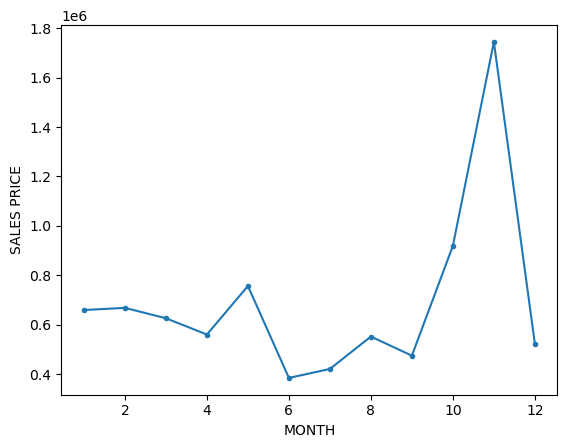

In [ ]:
#Plot for total revenue generated for each month
plt.plot(s.groups.keys(),s.groups.values(),marker='.')
plt.xlabel('MONTH')
plt.ylabel('SALES PRICE')
plt.show()

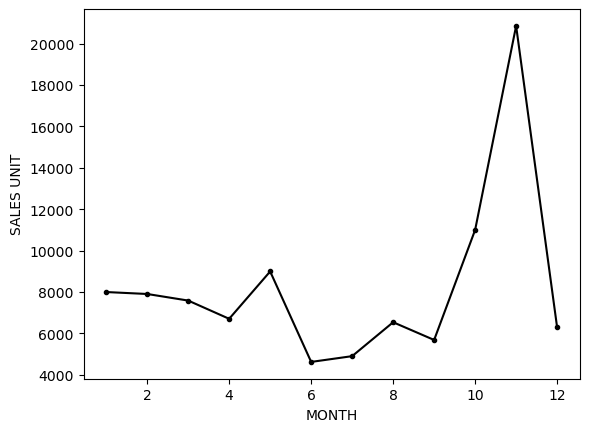

In [ ]:
#Plot of total units sold each month
plt.plot(unit.groups.keys(),unit.groups.values(),color="black",marker='.')
plt.xlabel('MONTH')
plt.ylabel('SALES UNIT')
plt.show()

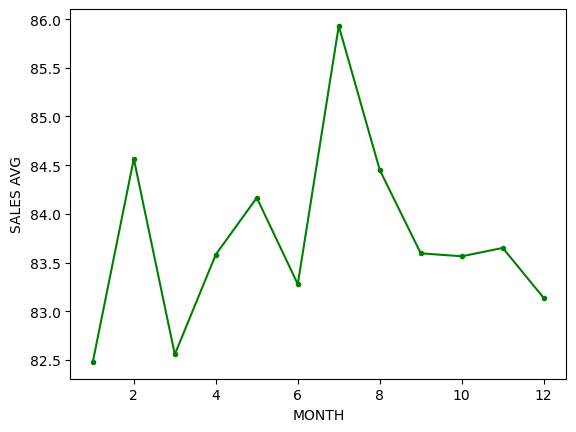

In [ ]:
# plot of average price per unit for each month
plt.plot(avg.keys(),avg.values(),color="green",marker='.')
plt.xlabel('MONTH')
plt.ylabel('SALES AVG')
plt.show()

In [ ]:
# The top five cities have the highest sales rates
unit= sd.groupby(['CITY'])
s= unit['QUANTITYORDERED'].sum()
s= s.sort_values(ascending=False).head(5)
s

CITY
Madrid        10958
San Rafael     6366
NYC            5294
Singapore      2760
Paris          2521
Name: QUANTITYORDERED, dtype: int64